In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [151]:
import os
import pandas as pd
import numpy as np
from datetime import datetime  
from datetime import timedelta
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import seaborn as sns

In [3]:
os.chdir("C:\\Users\\Julio\\Documents\\Data_science\\Casa_andina\\data\\")
os.getcwd()

'C:\\Users\\Julio\\Documents\\Data_science\\Casa_andina\\data'

In [4]:
data_2015_1Q=pd.read_excel("Q/2015_1H.xlsx")
data_2015_2Q=pd.read_excel("Q/2015_2H.xlsx")
data_2016_1Q=pd.read_excel("Q/2016_1Q.xls")
data_2016_2Q=pd.read_excel("Q/2016_2Q.xls")
data_2016_3Q=pd.read_excel("Q/2016_3Q.xls")
data_2016_4Q=pd.read_excel("Q/2016_4Q.xls")
data_2017_1Q=pd.read_excel("Q/2017_1Q.xls")
data_2017_2Q=pd.read_excel("Q/2017_2Q.xls")
data_2017_3Q=pd.read_excel("Q/2017_3Q.xls")
data_2017_4Q=pd.read_excel("Q/2017_4Q.xls")
data_2018_1Q=pd.read_excel("Q/2018_1Q.xls")
data_2018_2Q=pd.read_excel("Q/2018_2Q.xls")
data_2018_3Q=pd.read_excel("Q/2018_3Q.xls")
data_2018_4Q=pd.read_excel("Q/2018_4Q.xls")

In [5]:
historical_data = pd.concat([data_2015_1Q, data_2015_2Q
                    , data_2016_1Q, data_2016_2Q, data_2016_3Q, data_2016_4Q
                    , data_2017_1Q, data_2017_2Q, data_2017_3Q, data_2017_4Q
                    , data_2018_1Q, data_2018_2Q, data_2018_3Q, data_2018_4Q
                   ])

In [7]:
meses=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
codigo=range(1, 13)
cod_mes=pd.DataFrame({"mes":meses, "cod_mes":codigo})

In [9]:
historical_data=historical_data.merge(cod_mes, left_on="MesEstadia", right_on="mes", how="left")

In [10]:
historical_data["fecha"]=pd.to_datetime(historical_data.AñoEstadia.map(str)+"-"+historical_data.cod_mes.map(str)+"-"+historical_data.DiaEstadia.map(str))

In [279]:
hotel="CAP MIRAFLORES"
fecha='2018-11-13'
historical_data[(historical_data.Hotel==hotel)&(historical_data.fecha==fecha)]

,AñoEstadia,ESTADORESERVA,MesEstadia,Hotel,DiaEstadia,DiaSemanaEstadia,Grupo_Segmento,Segmento,ENTI_NOME,Noches,OCUP,ADR,RoomRev,mes,cod_mes,fecha
689318,2018,CHECK IN,Nov,CAP MIRAFLORES,13,Mar,COMPLIMENTARY,COMPLIMENTARY,-,2,0.013514,0,0.0000,Nov,11,2018-11-13
689319,2018,CHECK IN,Nov,CAP MIRAFLORES,13,Mar,CORPORATIVO,LARGA ESTADIA,AIR EUROPA LINEAS AEREAS S.A. SUCURSAL DEL PERU,1,0.006757,71.4498,71.4498,Nov,11,2018-11-13
689320,2018,CHECK IN,Nov,CAP MIRAFLORES,13,Mar,CORPORATIVO,NEGOCIO INDIVIDUALES,ANDRITZ HYDRO S.A.,1,0.006757,110.5,110.5000,Nov,11,2018-11-13
689321,2018,CHECK IN,Nov,CAP MIRAFLORES,13,Mar,CORPORATIVO,NEGOCIO INDIVIDUALES,ANDRITZ HYDRO S.R.L.UNIPERSONALE,2,0.013514,126.5,253.0000,Nov,11,2018-11-13
689322,2018,CHECK IN,Nov,CAP MIRAFLORES,13,Mar,CORPORATIVO,NEGOCIO INDIVIDUALES,ARCELORMITTAL INTERNATIONAL PERU S.A.C.,1,0.006757,126.5,126.5000,Nov,11,2018-11-13
689323,2018,CHECK IN,Nov,CAP MIRAFLORES,13,Mar,CORPORATIVO,NEGOCIO INDIVIDUALES,BIJOU PERU SOCIEDAD ANONIMA CERRADA,2,0.013514,122.405,244.8102,Nov,11,2018-11-13
689324,2018,CHECK IN,Nov,CAP MIRAFLORES,13,Mar,CORPORATIVO,NEGOCIO INDIVIDUALES,BRITT PERU S.A.C.,1,0.006757,0,0.0000,Nov,11,2018-11-13
689325,2018,CHECK IN,Nov,CAP MIRAFLORES,13,Mar,CORPORATIVO,NEGOCIO INDIVIDUALES,COMPAÑIA GOODYEAR DEL PERU S.A.,1,0.006757,104.767,104.7669,Nov,11,2018-11-13
689326,2018,CHECK IN,Nov,CAP MIRAFLORES,13,Mar,CORPORATIVO,NEGOCIO INDIVIDUALES,FERROCARRIL TRANSANDINO S.A,1,0.006757,126.5,126.5000,Nov,11,2018-11-13
689327,2018,CHECK IN,Nov,CAP MIRAFLORES,13,Mar,CORPORATIVO,NEGOCIO INDIVIDUALES,FUNDACION BIBLIOTECA VIRTUAL MIGUEL DE CERVANTES,1,0.006757,122.405,122.4051,Nov,11,2018-11-13


In [13]:
rango=pd.date_range(start=min(historical_data.fecha), end=max(historical_data.fecha), freq='D')

In [280]:
fecha_max=pd.to_datetime("2018-11-13")
def serie_historica_hotel(data, hotel, campo_ocupacion="OCUP"):
    valores=list()
    data_hotel=data[data.Hotel==hotel]
    rango=pd.date_range(start=min(data_hotel.fecha), end=fecha_max, freq='D')
    for fecha in rango:
        data_hotel_fecha=data_hotel[data_hotel.fecha==fecha]
        valor=data_hotel_fecha[campo_ocupacion].sum()
        valores.append(valor) 
    serie=pd.DataFrame({"fecha":rango, "ocupacion":valores})
    return(serie)

### Creamos la serie de tiempo de un hotel especifico. En este caso es el CAP MIRAFLORES

In [281]:
hotel="CAP MIRAFLORES"
serie_historica_CAP_MIRAFLORES=serie_historica_hotel(data=historical_data, hotel=hotel)
ts=serie_historica_CAP_MIRAFLORES.set_index("fecha")

In [329]:
serie_historica_CAP_MIRAFLORES.fecha.max()

Timestamp('2018-11-13 00:00:00')

#### Partimos creamos 3 series de 1 año de duracion y las almacenamos en un DataFrame. 
Ademas calculamos las diferencias entre dos series y calculamos el promedio de las series 2 y 3 y su diferencia con la serie 1.

In [330]:
fecha_actual=pd.to_datetime("2018-11-13")
periodo=pd.to_timedelta(364, unit='D')
fecha_1=fecha_actual-periodo
fecha_2=fecha_1-periodo
fecha_3=fecha_2-periodo
serie_1=serie[(serie.fecha<=fecha_actual) &(serie.fecha>fecha_1)]
serie_2=serie[(serie.fecha<=fecha_1) &(serie.fecha>fecha_2)]
serie_3=serie[(serie.fecha<=fecha_2) &(serie.fecha>fecha_3)]
serie_1.columns=["fecha_1", "ocupacion_1"]
serie_2.columns=["fecha_2", "ocupacion_2"]
serie_3.columns=["fecha_3", "ocupacion_3"]
serie_1["num_dia"]=range(364)
serie_2["num_dia"]=range(364)
serie_3["num_dia"]=range(364)
serie_por_anho=serie_1.merge(serie_2, on="num_dia")
serie_por_anho=serie_por_anho.merge(serie_3, on="num_dia")
serie_por_anho["dif_12"]=serie_por_anho.ocupacion_1-serie_por_anho.ocupacion_2
serie_por_anho["dif_13"]=serie_por_anho.ocupacion_1-serie_por_anho.ocupacion_3
serie_por_anho["dif_23"]=serie_por_anho.ocupacion_2-serie_por_anho.ocupacion_3
serie_por_anho["ocupacion_promedio_23"]=(serie_por_anho.ocupacion_2+serie_por_anho.ocupacion_3)/2.0
serie_por_anho["dif_promedio"]=serie_por_anho.ocupacion_1-serie_por_anho.ocupacion_promedio_23

C:\Users\Julio\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Julio\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Julio\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [331]:
ts_1=serie_1.set_index("fecha_1")
ts_2=serie_2.set_index("fecha_2")
ts_3=serie_3.set_index("fecha_3")
ts_1.drop(columns="num_dia", inplace=True)
ts_2.drop(columns="num_dia", inplace=True)
ts_3.drop(columns="num_dia", inplace=True)

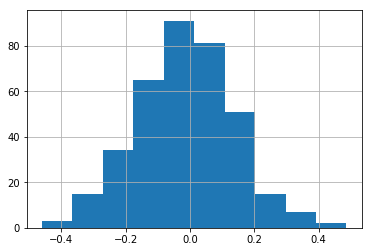

In [332]:
serie_por_anho.dif_12.hist()

In [333]:
serie_por_anho.dif_12.std()

0.14966152016214399

In [334]:
serie_por_anho.dif_promedio.std()

0.13544126454988298

In [295]:
serie_por_anho.head()

,fecha_1,ocupacion_1,num_dia,fecha_2,ocupacion_2,fecha_3,ocupacion_3,dif_12,dif_13,dif_23,ocupacion_promedio_23,dif_promedio
0,2017-11-18,0.925676,0,2016-11-19,0.912162,2015-11-21,0.8998,0.013514,0.025876,0.012362,0.905981,0.019695
1,2017-11-19,0.804054,1,2016-11-20,0.364865,2015-11-22,0.7106,0.439189,0.093454,-0.345735,0.537732,0.266322
2,2017-11-20,0.729730,2,2016-11-21,0.878378,2015-11-23,0.9470,-0.148649,-0.217270,-0.068622,0.912689,-0.182959
3,2017-11-21,0.695946,3,2016-11-22,0.952703,2015-11-24,0.8252,-0.256757,-0.129254,0.127503,0.888951,-0.193005
4,2017-11-22,0.918919,4,2016-11-23,0.972973,2015-11-25,0.9468,-0.054054,-0.027881,0.026173,0.959886,-0.040968


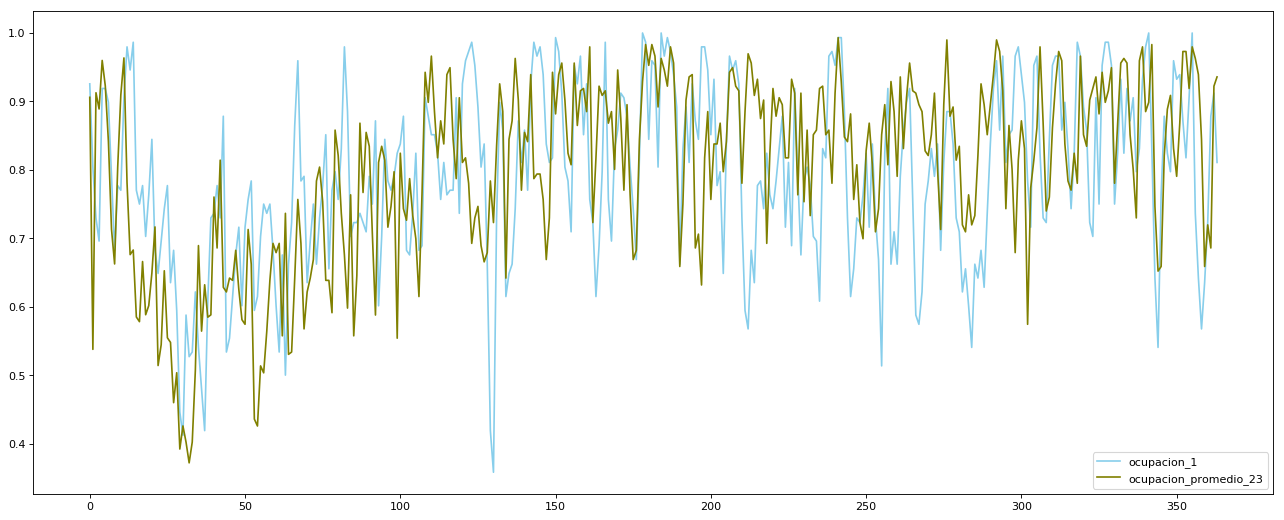

In [296]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot("num_dia", "ocupacion_1", data=serie_por_anho, color="skyblue")
plt.plot("num_dia", "ocupacion_promedio_23", data=serie_por_anho, color="olive")
#plt.plot("num_dia", "ocupacion_2", data=serie_por_anho, color="olive")
plt.legend()

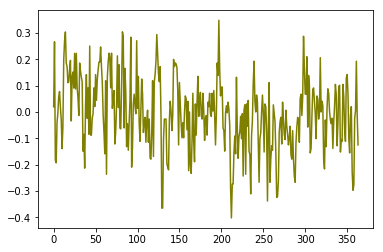

In [297]:
plt.plot("num_dia", "dif_promedio", data=serie_por_anho, color="olive")

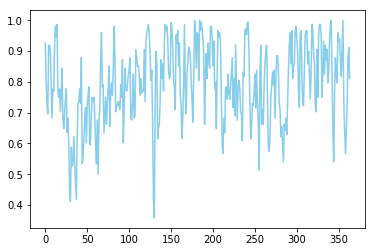

In [298]:
plt.plot("num_dia", "ocupacion_1", data=serie_1, color="skyblue")

#### Definimos medidas de error

In [299]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

In [300]:
def medidas_de_error(y, y_pred):
    print("MAE", mean_absolute_error(y, y_pred), 
          "\n""MAPE", mean_absolute_percentage_error(y, y_pred), 
          "\n""RMSE", np.sqrt(mean_squared_error(y, y_pred)))

In [301]:
medidas_de_error(serie_por_anho.ocupacion_1, serie_por_anho.ocupacion_2)

MAE 0.1183174933174933 
MAPE 0.16046304391739902 
RMSE 0.1492473498263096


In [302]:
medidas_de_error(serie_por_anho.ocupacion_1, serie_por_anho.ocupacion_3)

MAE 0.13095989753489753 
MAPE 0.17727479613096128 
RMSE 0.16794506313886035


In [303]:
medidas_de_error(serie_por_anho.ocupacion_1, serie_por_anho.ocupacion_promedio_23)

MAE 0.10657756534006534 
MAPE 0.14533468740086333 
RMSE 0.13542592845626675


#### Suavizamos las curvas

In [83]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

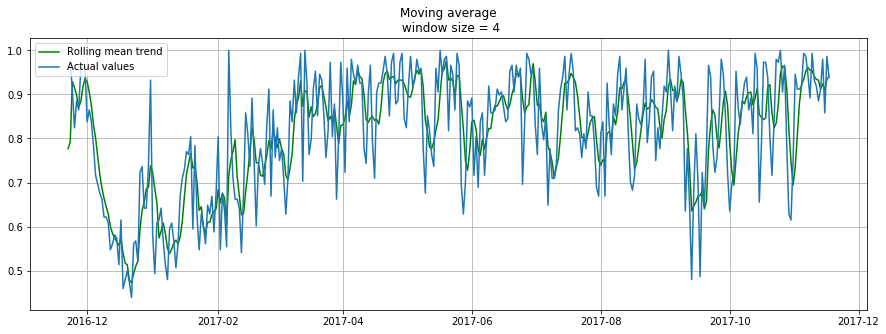

In [163]:
plotMovingAverage(ts_2, 4)

In [103]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [104]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

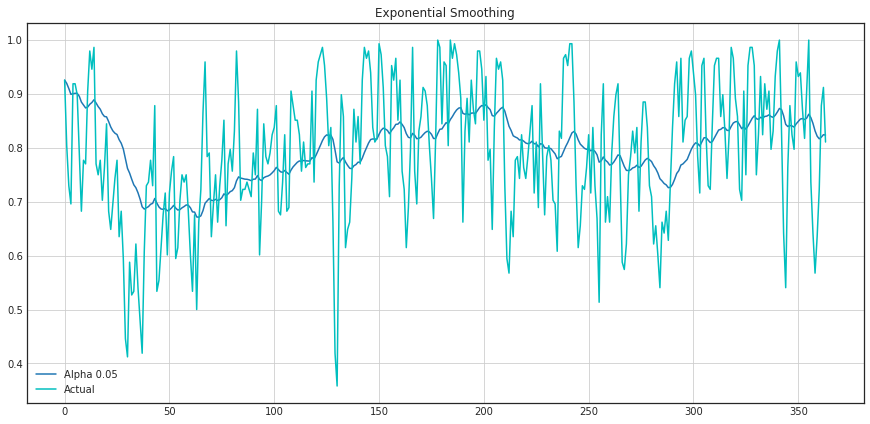

In [304]:
plotExponentialSmoothing(ts_1.ocupacion_1, [0.05])

In [120]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

C:\Users\Julio\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


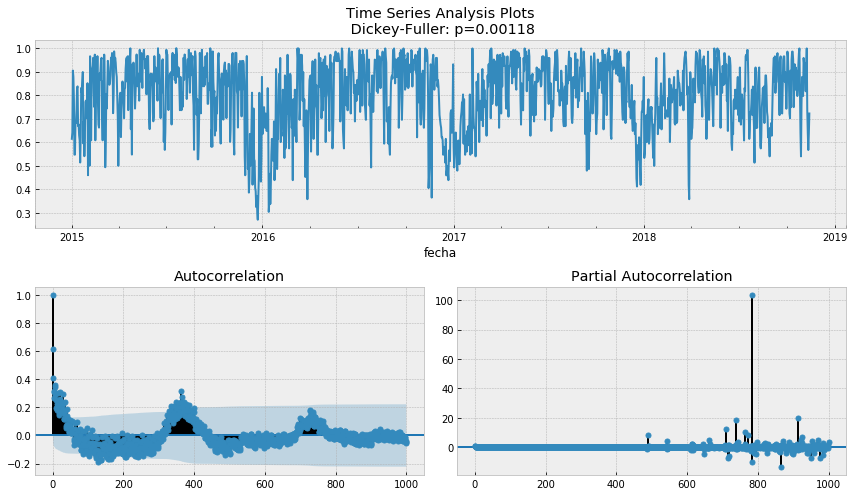

In [305]:
tsplot(ts.ocupacion, lags=1000)

In [132]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [306]:
regr = linear_model.LinearRegression()

In [307]:
train, test = train_test_split(serie_por_anho, test_size=0.2)

In [308]:
y_train=train["ocupacion_1"]
X_train=train[["ocupacion_2", "ocupacion_3"]]
y_test=test["ocupacion_1"]
X_test=test[["ocupacion_2", "ocupacion_3"]]

In [309]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [310]:
y_pred = regr.predict(X_train)
medidas_de_error(y_train, y_pred)

MAE 0.09014097692641687 
MAPE 0.12155485994781144 
RMSE 0.11223248447322604


In [311]:
y_pred_test = regr.predict(X_test)
medidas_de_error(y_test, y_pred_test)

MAE 0.096340585637491 
MAPE 0.13694841902210234 
RMSE 0.11835336068374687


In [312]:
medidas_de_error(serie_por_anho.ocupacion_1, serie_por_anho.ocupacion_promedio_23)

MAE 0.10657756534006534 
MAPE 0.14533468740086333 
RMSE 0.13542592845626675


In [313]:
regr.coef_

array([0.25567714, 0.18973836])

In [314]:
regr.intercept_

0.43712127808709267

C:\Users\Julio\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Julio\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


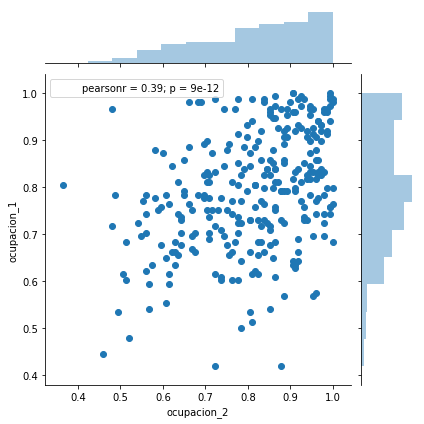

In [315]:
sns.jointplot(X_train.ocupacion_2, y_train)

In [316]:
serie_por_anho.head()

,fecha_1,ocupacion_1,num_dia,fecha_2,ocupacion_2,fecha_3,ocupacion_3,dif_12,dif_13,dif_23,ocupacion_promedio_23,dif_promedio
0,2017-11-18,0.925676,0,2016-11-19,0.912162,2015-11-21,0.8998,0.013514,0.025876,0.012362,0.905981,0.019695
1,2017-11-19,0.804054,1,2016-11-20,0.364865,2015-11-22,0.7106,0.439189,0.093454,-0.345735,0.537732,0.266322
2,2017-11-20,0.729730,2,2016-11-21,0.878378,2015-11-23,0.9470,-0.148649,-0.217270,-0.068622,0.912689,-0.182959
3,2017-11-21,0.695946,3,2016-11-22,0.952703,2015-11-24,0.8252,-0.256757,-0.129254,0.127503,0.888951,-0.193005
4,2017-11-22,0.918919,4,2016-11-23,0.972973,2015-11-25,0.9468,-0.054054,-0.027881,0.026173,0.959886,-0.040968


In [317]:
window=3
ts_2_suave=ts_2.rolling(window=window).mean()
ts_3_suave=ts_3.rolling(window=window).mean()

In [318]:
df=pd.DataFrame()
df["x_1"]=ts_2_suave.ocupacion_2.reset_index(drop=True)
df["x_2"]=ts_3_suave.ocupacion_3.reset_index(drop=True)
df["y"]=ts_1.ocupacion_1.reset_index(drop=True)

In [319]:
df=df.dropna()
df.head()

,x_1,x_2,y
2,0.718468,0.852467,0.729730
3,0.731982,0.827600,0.695946
4,0.934685,0.906333,0.918919
5,0.945946,0.901700,0.918919
6,0.903153,0.912967,0.898649


In [320]:
train, test = train_test_split(df, test_size=0.3)

In [321]:
y_train=train["y"]
X_train=train[["x_1", "x_2"]]
y_test=test["y"]
X_test=test[["x_1", "x_2"]]

In [322]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [323]:
y_pred = regr.predict(X_train)
medidas_de_error(y_train, y_pred)

MAE 0.08832199486544794 
MAPE 0.12001996211095371 
RMSE 0.11158253055150624


In [324]:
y_pred_test = regr.predict(X_test)
medidas_de_error(y_test, y_pred_test)

MAE 0.09340756825896307 
MAPE 0.13218682366364112 
RMSE 0.11676504571235752


In [325]:
regr.intercept_

0.32674218937481925

In [326]:
regr.coef_

array([0.36234173, 0.23112302])

In [327]:
historical_data.sort_values(by="fecha", ascending=False)

,AñoEstadia,ESTADORESERVA,MesEstadia,Hotel,DiaEstadia,DiaSemanaEstadia,Grupo_Segmento,Segmento,ENTI_NOME,Noches,OCUP,ADR,RoomRev,mes,cod_mes,fecha
711330,2018,RESERVA,Dic,CAST TRUJILLO PLAZA,31,Lun,OTAs,OTAS,DESPEGAR.COM PERU SAC,2,0.043478,34.4955,68.9910,Dic,12,2018-12-31
707394,2018,RESERVA,Dic,CAP MIRAFLORES,31,Lun,DIRECTO,DIRECTO INDIVIDUALES,PROMO HOT BBVA OCTUBRE,1,0.006757,111.457,111.4575,Dic,12,2018-12-31
707405,2018,RESERVA,Dic,CAP MIRAFLORES,31,Lun,RECEPTIVO,TURISMO SERIE Y CRUCERO,CONDOR TRAVEL S.A.C.,1,0.006757,103,103.0000,Dic,12,2018-12-31
707404,2018,RESERVA,Dic,CAP MIRAFLORES,31,Lun,RECEPTIVO,TURISMO INDIVIDUALES,TRAVEL GROUP PERU S.A.,3,0.020270,118,354.0000,Dic,12,2018-12-31
707403,2018,RESERVA,Dic,CAP MIRAFLORES,31,Lun,RECEPTIVO,TURISMO INDIVIDUALES,PERSONALIZED TOURS EMPRESA INDIVIDUAL DE RESPO...,1,0.006757,177,177.0000,Dic,12,2018-12-31
707402,2018,RESERVA,Dic,CAP MIRAFLORES,31,Lun,RECEPTIVO,TURISMO INDIVIDUALES,MACHUPICCHU BRASIL E.I.R.L.,1,0.006757,107,107.0000,Dic,12,2018-12-31
707401,2018,RESERVA,Dic,CAP MIRAFLORES,31,Lun,RECEPTIVO,TURISMO INDIVIDUALES,LIMA TOURS S.A.C.,6,0.040541,110.917,665.5000,Dic,12,2018-12-31
707400,2018,RESERVA,Dic,CAP MIRAFLORES,31,Lun,RECEPTIVO,TURISMO INDIVIDUALES,FIESTA TOURS INTERNATIONAL SA,2,0.013514,109,218.0000,Dic,12,2018-12-31
707399,2018,RESERVA,Dic,CAP MIRAFLORES,31,Lun,RECEPTIVO,TURISMO INDIVIDUALES,ANDBEYOND CHILE SPA,1,0.006757,208.6,208.6000,Dic,12,2018-12-31
707398,2018,RESERVA,Dic,CAP MIRAFLORES,31,Lun,OTAs,OTAS,EXPEDIA INC,7,0.047297,89.0636,623.4455,Dic,12,2018-12-31


In [328]:
serie_por_anho.sort_values(by="fecha_1", ascending=False)

,fecha_1,ocupacion_1,num_dia,fecha_2,ocupacion_2,fecha_3,ocupacion_3,dif_12,dif_13,dif_23,ocupacion_promedio_23,dif_promedio
363,2018-11-16,0.810811,363,2017-11-17,0.939189,2016-11-18,0.932432,-0.128378,-0.121622,0.006757,0.935811,-0.125000
362,2018-11-15,0.912162,362,2017-11-16,0.986486,2016-11-17,0.858108,-0.074324,0.054054,0.128378,0.922297,-0.010135
361,2018-11-14,0.878378,361,2017-11-15,0.858108,2016-11-16,0.513514,0.020270,0.364865,0.344595,0.685811,0.192568
360,2018-11-13,0.722973,360,2017-11-14,0.979730,2016-11-15,0.459459,-0.256757,0.263514,0.520270,0.719595,0.003378
359,2018-11-12,0.635135,359,2017-11-13,0.912162,2016-11-14,0.405405,-0.277027,0.229730,0.506757,0.658784,-0.023649
358,2018-11-11,0.567568,358,2017-11-12,0.885135,2016-11-13,0.804054,-0.317568,-0.236486,0.081081,0.844595,-0.277027
357,2018-11-10,0.641892,357,2017-11-11,0.918919,2016-11-12,0.959459,-0.277027,-0.317568,-0.040541,0.939189,-0.297297
356,2018-11-09,0.736486,356,2017-11-10,0.932432,2016-11-11,0.993243,-0.195946,-0.256757,-0.060811,0.962838,-0.226351
355,2018-11-08,1.000000,355,2017-11-09,0.993243,2016-11-10,0.966216,0.006757,0.033784,0.027027,0.979730,0.020270
354,2018-11-07,0.905405,354,2017-11-08,0.891892,2016-11-09,0.945946,0.013514,-0.040541,-0.054054,0.918919,-0.013514
